In [1]:
## BASIC
import numpy as np
import networkx as nx
import community
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/ericluo04/Documents/GitHub/Bots-Project/Code/"

In [82]:
len(file)

9636

In [78]:
G = nx.DiGraph()
file = open(path + '3. HK Bots/RT_graphs/G0_RT_GRAPH.csv', 'r').read().split('\n')

for i in file:
    if(len(i)>0 and np.random.random_sample() < .1):
        split = i.split(';')
        G.add_edge(int(float(split[0])), int(float(split[1])), weight = float(split[2]))
    
A = nx.to_numpy_matrix(G)
dout = dict(G.out_degree())

In [83]:
len(dout)

1432

In [79]:
users = pd.DataFrame(list(G.nodes), columns = ["user_id"])
# import user polarity values and merge into data frame
polarities = pd.read_csv(path + "2. HK Training\polarities\polarities_new.csv")

users2 = users.merge(polarities, left_on='user_id', right_on='id', how='left')[['user_id', 'polarity']]
polarity = list(users2['polarity'])

divide=[]
for i in range(len(polarity)):
    if polarity[i]>.5 or polarity[i]=='nan':
        divide.append(1)
    else:
        divide.append(0)

In [86]:
test = pd.read_csv(path + "2. HK Training\polarities\polarities_new.csv")


In [87]:
test

,Unnamed: 0,id,n_followers,description,n_friends,location,name,screen_name,n_tweets_user,created_at,n_tweets_model,polarity
0,479495716,479495716,969.0,A #Hongkonger who strives for #democracy and #...,865.0,Hong Kong,Eunayai,Eunayai11111,2480.0,2019-10-31 10:55:37,76,0.436160
1,1229771556,1229771556,183.0,,430.0,,Ling,Ling4608,3687.0,2019-11-03 19:40:15,44,0.676935
2,1165271203554086912,1165271203554086912,1379.0,Freedom is the freedom to say that 2+2=4. Ant...,1664.0,Hong Kong,1984inChina,1984inChina,5480.0,2019-10-26 12:42:35,645,0.415886
3,4609887372,4609887372,98.0,Stand with Hong Kong \U0001f1ed\U0001f1f0,452.0,Hong Kong,Jennifer Ng\U0001f388,jenniferrrng,879.0,2019-10-08 10:04:47,107,0.446689
4,48224368,48224368,207.0,Just doing something to protect my home from i...,319.0,Hong Kong,Free DIYer,amplebiz,1282.0,2019-10-08 06:43:56,87,0.489725
...,...,...,...,...,...,...,...,...,...,...,...,...
462837,3266191880,3266191880,150.0,\u4e00\u5fdc\u30ea\u30a2\u57a2\u3060\u3063\u30...,54.0,,\u30c8\u30ea\u30ab\u30eb,_trical,23172.0,2019-10-26 21:17:02,1,0.897878
462838,157583088,157583088,122.0,\u6620\u753b\u30fb\u97f3\u697d\u30fb\u30a2\u30...,68.0,Japan,Shota T,sasakurex,4485.0,2019-10-26 15:52:07,1,0.746148
462839,1172279983705739264,1172279983705739264,92.0,\u53f0\u98a819\u53f7\u88ab\u707d\u5730\u533b\u...,248.0,"Snowy area, Japan / \u65e5\u672c\u306e\u96ea\u...",clipfun,mini2clip,1733.0,2019-10-26 12:17:48,1,0.897878
462840,908206346490626048,908206346490626048,1.0,Sleepy,41.0,Hong Kong,Lazijaja,lazijajaja,25.0,2019-10-26 06:33:42,1,0.100058


In [80]:
pos = nx.spring_layout(G, k=0.085)

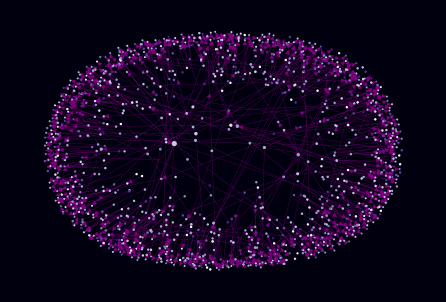

In [81]:
#draw the retweet network with node size proportional to the out-degree.
fig = plt.figure()
nx.draw(G, pos, nodelist=list(dout.keys()), node_size=[v+1 for v in dout.values()], width=0.25, node_color=polarity, cmap = "Purples", edge_color="purple")
fig.set_facecolor("#00000F")
plt.show()

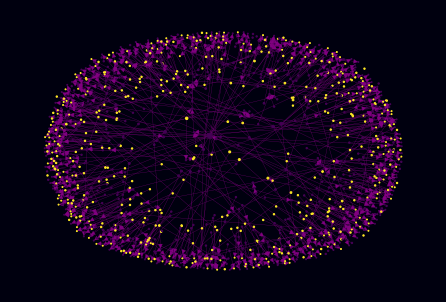

In [48]:
fig = plt.figure()
nx.draw(G, pos, nodelist=list(dout.keys()), node_size=[v+1 for v in dout.values()], width=0.25, node_color=divide, edge_color="purple")
fig.set_facecolor("#00000F")
plt.show()

In [49]:
G_undir = G.to_undirected()

In [55]:
partition = community.best_partition(G_undir)
louv_part = list(partition.values())

In [84]:
len(louv_part)

1475

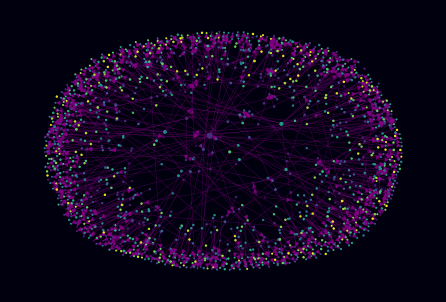

In [56]:
fig = plt.figure()
nx.draw(G, pos, nodelist=list(dout.keys()), node_size=[v+1 for v in dout.values()], width=0.25, node_color=louv_part, edge_color="purple")
fig.set_facecolor("#00000F")
plt.show()